# OISSTv2 Live Update Testing

This notebook is for documenting the steps to build a single annual OISSTv2 file using update caches. 

The steps were developed initially in `Update_01_Download_OISST` then the steps were abstracted into functions and placed into the `oisstools.py` module. This notebook will follow the same steps but with much less code, hopefully with less room for error.

This notebook exists to document the processing steps, but has since been replaced by script workflows using prefect in `oisst_prefect.py`. Use this notebook for debugging or extending the workflow, then transfer to `oisst_prefect.py`

In [1]:
# Libraries
from bs4 import BeautifulSoup
import requests
import os
import xarray as xr
import datetime
import oisstools as ot


#### 1. Set workspace
workspace = "local"
box_root = ot.set_workspace("local")
_cache_root = ot.set_cache_root(box_root)


#### 2. What Months are we checking?
this_month = ot.get_update_month(return_this_month = True)
last_month = ot.get_update_month(return_this_month = False)
update_yr  = ot.check_update_yr(for_this_month = True)


#### 3. Print Last Update
print(f"Working via directory at: {box_root}")
print(f"Updated using months:     {last_month} & {this_month}")

Working via directory at: /Users/akemberling/Box/
Updated using months:     07 & 08


## 1. Update Last Month

In [2]:
# Use cache_oisst function to update cache for last month
ot.cache_oisst(cache_month = last_month, 
               update_yr = update_yr, 
               workspace = workspace, 
               verbose = True)

Caching Daily NETCDF File: oisst-avhrr-v02r01.20210701.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210702.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210703.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210704.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210705.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210706.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210707.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210708.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210709.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210710.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210711.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210712.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210713.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210714.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210715.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210716.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210717.nc
Caching Daily 

## 2. Update This Month

In [3]:
# Use cache_oisst function to update cache for last month
ot.cache_oisst(cache_month = this_month, 
               update_yr = update_yr, 
               workspace = workspace, 
               verbose = True)

Caching Daily NETCDF File: oisst-avhrr-v02r01.20210801_preliminary.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210802_preliminary.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210803_preliminary.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210804_preliminary.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210805_preliminary.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210806_preliminary.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210807_preliminary.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210808_preliminary.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210809_preliminary.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210810_preliminary.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210811_preliminary.nc
Current month preliminary data found for: 20210801
Current month preliminary data found for: 20210802
Current month preliminary data found for: 20210803
Current month preliminary data found for: 20210804
Current month preliminary 

## 3. Build Annual File

In [4]:
# Assemble the annual file
oisst_update = ot.build_annual_from_cache(last_month = last_month, 
                                          this_month = this_month, 
                                          workspace = workspace, 
                                          verbose = True)

## 4. Check Annual file

Want to see consistency in the dimensions, and data from the beginning of the year through to the update month.

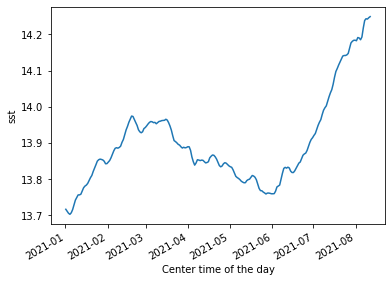

In [6]:
#oisst_update
#oisst_update.isel(time = -1).sst.plot()
oisst_update.sst.mean(("lon", "lat")).plot()

## 5. Export Update

In [7]:
# export update using same file pattern as everything else
ot.export_annual_update(cache_root = _cache_root,
                       update_yr = update_yr,
                       oisst_update = oisst_update)

File Saved to /Users/akemberling/Box/RES_Data/OISST/oisst_mainstays/annual_observations/sst.day.mean.2021.v2.nc
